In [322]:
import os
import json
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [323]:
directory = "/home/mert/Desktop/covid_cough_project/segmented/pos/"
audio_name = "pos-0421-084-cough-m-50-0.mp3"
x , sr = librosa.load(os.path.join(directory, audio_name))
ipd.Audio(os.path.join(directory, audio_name))

In [324]:
sr

22050

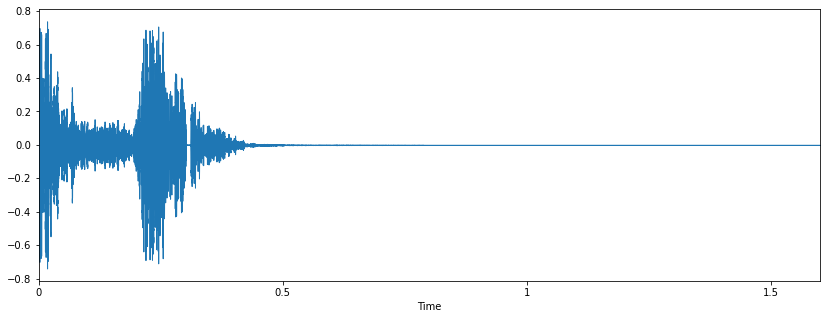

In [325]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

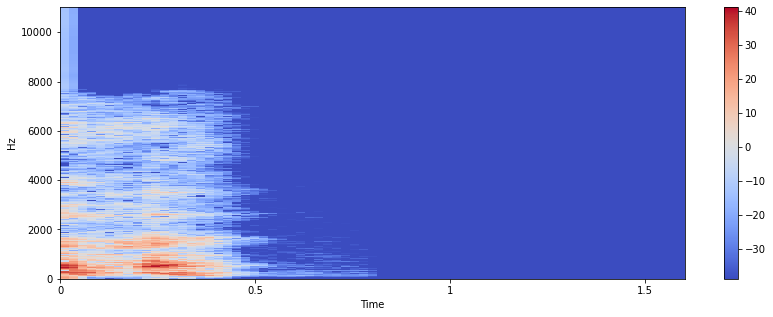

In [326]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

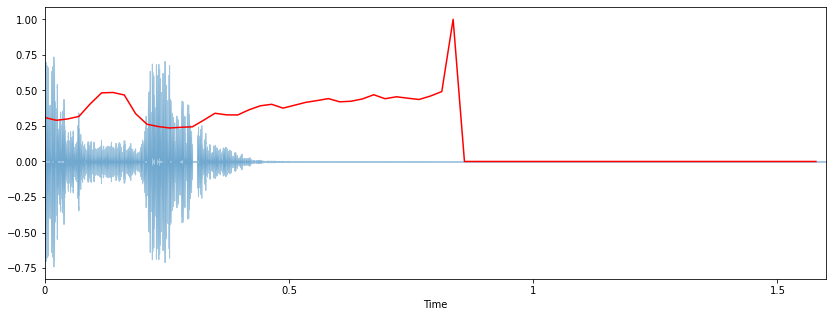

In [327]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

# Computing the time variable for visualization
plt.figure(figsize=(14, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [328]:
x.shape

(35278,)

### Spectral Centroid

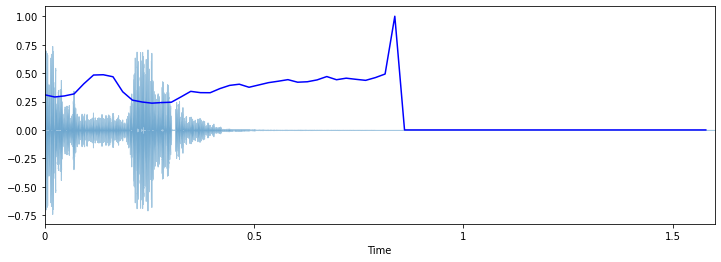

In [329]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

### Spectral Rollof

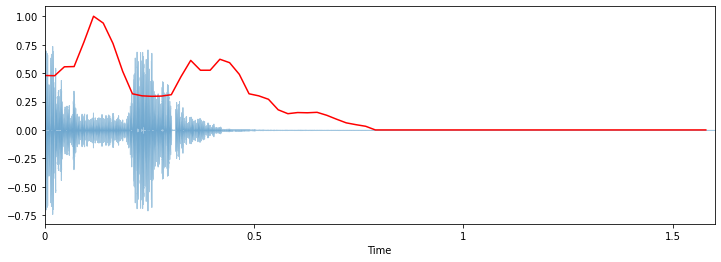

In [330]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Spectral Bandwith

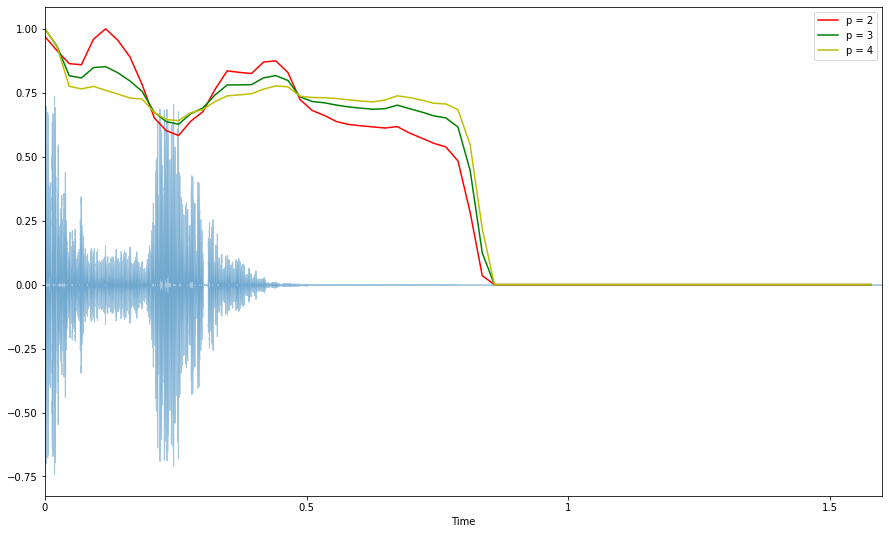

In [331]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

### Zero-Crossing Rate

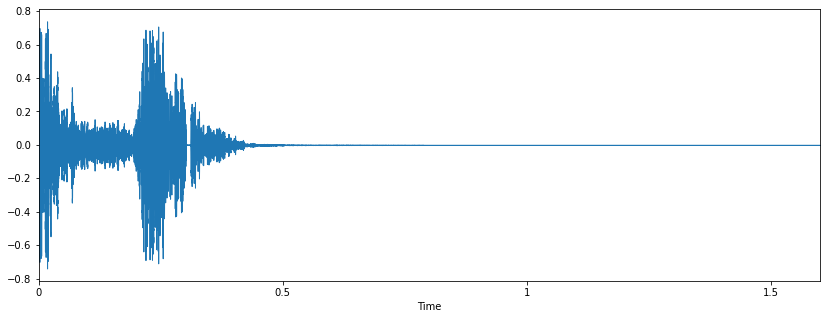

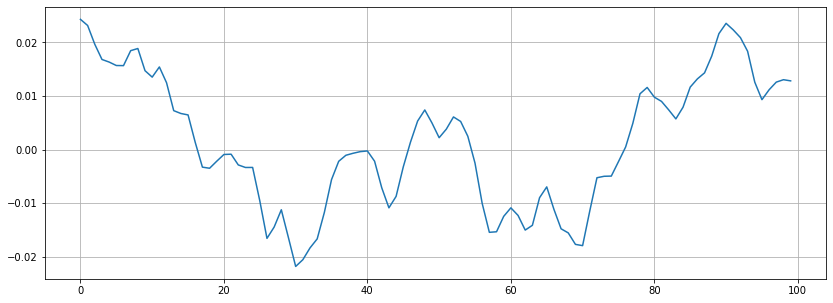

In [332]:
vid_name = "pos-0421-084-cough-m-50-0.mp3"

x, sr = librosa.load(os.path.join(directory, vid_name))
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [333]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

4


### Mel-Frequency Cepstral Coefficients

(20, 69)


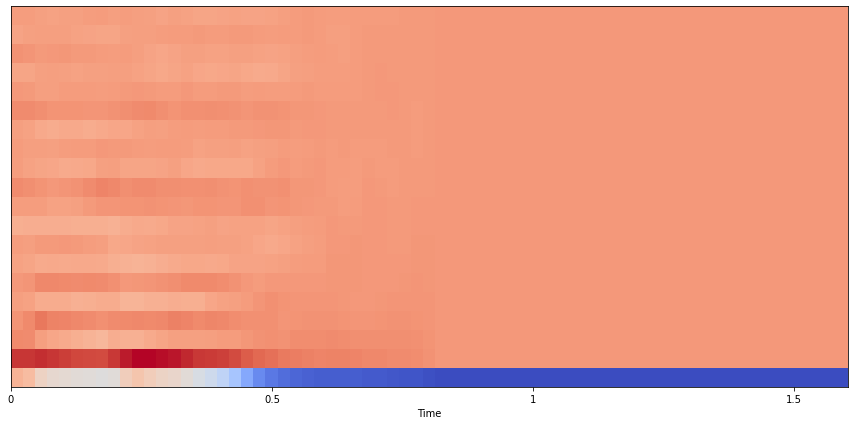

In [334]:
mfccs = librosa.feature.mfcc(x, sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [335]:
mfccs.shape

(20, 69)

### Chroma Feature

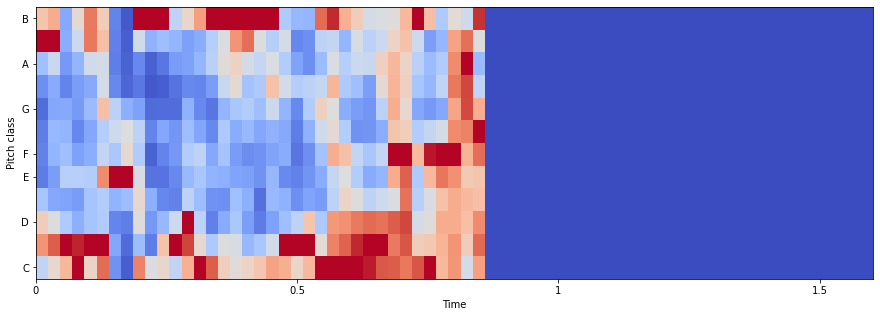

In [336]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [337]:
chromagram.shape

(12, 69)

In [338]:
mfccs.shape

(20, 69)

In [339]:
spectral_bandwidth_2.shape

(69,)

In [340]:
spectral_bandwidth_3.shape

(69,)

In [341]:
spectral_bandwidth_4.shape

(69,)

In [342]:
spectral_rolloff.shape

(69,)

In [343]:
spectral_centroids.shape

(69,)

In [344]:
spectral_bandwidth_2

array([2003.61137275, 1888.67219335, 1785.51924364, 1776.23696502,
       1982.8843642 , 2066.09926274, 1973.30223991, 1838.94867564,
       1616.44527399, 1348.09503487, 1244.39063121, 1206.67188419,
       1321.29522346, 1398.1092076 , 1577.9774146 , 1727.15560786,
       1714.99492295, 1705.92205998, 1798.46745894, 1807.44153464,
       1713.97324414, 1495.84367116, 1408.01102979, 1368.12228125,
       1318.8132836 , 1295.52420219, 1284.60572294, 1275.58264491,
       1266.69471897, 1278.29946374, 1226.88283545, 1186.01655181,
       1143.78485582, 1114.52427876, 1001.3758382 ,  587.9363428 ,
         76.92700913,    5.07542474,    5.07542474,    5.07542474,
          5.07542474,    5.07542474,    5.07542474,    5.07542474,
          5.07542474,    5.07542474,    5.07542474,    5.07542474,
          5.07542474,    5.07542474,    5.07542474,    5.07542474,
          5.07542474,    5.07542474,    5.07542474,    5.07542474,
          5.07542474,    5.07542474,    5.07542474,    5.07542

In [345]:
chromagram

array([[0.40279368, 0.53462917, 0.67120975, 1.        , 0.5588551 ,
        0.84960026, 0.1692149 , 0.04204414, 0.80383885, 0.4901619 ,
        0.5442346 , 0.40305656, 0.6884707 , 1.        , 0.878266  ,
        0.5856913 , 0.5130705 , 0.56492245, 0.61925524, 0.7246086 ,
        0.6933181 , 0.5544764 , 0.66094244, 1.        , 1.        ,
        1.        , 1.        , 0.9797803 , 0.89057076, 0.8818962 ,
        0.82537425, 0.8941298 , 1.        , 0.6674365 , 0.7587298 ,
        0.46594378, 0.7305804 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.76546997, 0.8785278 , 1.        , 0.97139543, 1. 

In [346]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers
from tensorflow.keras import layers
import tensorflow.keras
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

2022-01-22 15:43:17.368196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-22 15:43:17.368274: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [348]:
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
#header += ' label'
header = header.split()

In [349]:
pos_dir = "/home/mert/Desktop/covid_cough_project/segmented/pos/"
neg_dir = "/home/mert/Desktop/covid_cough_project/segmented/neg/"
import os
pos = os.listdir(path=pos_dir)
neg = os.listdir(path=neg_dir)

In [352]:
def get_features(X, sr):
    chroma_stft = librosa.feature.chroma_stft(y=X, sr=sr)
    rmse = librosa.feature.rms(y=X)
    spec_cent = librosa.feature.spectral_centroid(y=X, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=X, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=X, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(X)
    mfcc = librosa.feature.mfcc(y=X, sr=sr)
    return chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc

In [357]:
len(pos)

55

In [358]:
pos

['pos-0421-094-cough-m-51.mp3',
 'pos-0421-087-cough-f-40-5.mp3',
 'pos-0421-093-cough-f-24.mp3',
 'pos-0421-094-cough-m-51-3.mp3',
 'pos-0421-086-cough-m-65-8.mp3',
 'pos-0422-096-cough-m-31-8.mp3',
 'pos-0421-092-cough-m-53-6.mp3',
 'pos-0421-086-cough-m-65-0.mp3',
 'pos-0421-084-cough-m-50-6.mp3',
 'pos-0421-094-cough-m-51-4.mp3',
 'pos-0421-094-cough-m-51-2.mp3',
 'pos-0421-084-cough-m-50-7.mp3',
 'pos-0421-092-cough-m-53-3.mp3',
 'pos-0421-087-cough-f-40.mp3',
 'pos-0421-086-cough-m-65-1.mp3',
 'pos-0421-087-cough-f-40-3.mp3',
 'pos-0421-092-cough-m-53-0.mp3',
 'pos-0421-087-cough-f-40-0.mp3',
 'pos-0421-086-cough-m-65-5.mp3',
 'pos-0421-084-cough-m-50-5.mp3',
 'pos-0421-086-cough-m-65-6.mp3',
 'pos-0421-087-cough-f-40-6.mp3',
 'pos-0421-084-cough-m-50-3.mp3',
 'pos-0421-094-cough-m-51-0.mp3',
 'pos-0421-092-cough-m-53-13.mp3',
 'pos-0421-092-cough-m-53.mp3',
 'pos-0421-093-cough-f-24-5.mp3',
 'pos-0421-092-cough-m-53-1.mp3',
 'pos-0421-092-cough-m-53-9.mp3',
 'pos-0421-084-cough-

### For pos

In [359]:
file = open('data_pos.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(len(pos)):
    try:
        name = pos[i]
        x, sr = librosa.load(os.path.join(pos_dir, name))
        chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc = get_features(x, sr)
        to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            
        file = open('data_pos.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    except:
        print(f"{pos[i]} dosyası okunamadı")
        continue

### For neg

In [360]:
file = open('data_neg.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(len(neg)):
    try:
        name = neg[i]
        x, sr = librosa.load(os.path.join(neg_dir, name))
        chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc = get_features(x, sr)
        to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            
        file = open('data_neg.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    except:
        print(f"{neg[i]} dosyası okunamadı")
        continue

In [361]:
pos_data = pd.read_csv("data_pos.csv")
neg_data = pd.read_csv("data_neg.csv")

In [362]:
pos_data.shape

(55, 26)

In [363]:
neg_data.shape

(82, 26)

In [364]:
pos_data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.398971,0.050333,2057.119728,1748.158685,3840.580295,0.141124,-351.854523,67.796425,-28.611973,24.644041,...,-6.340559,-15.425233,2.723675,-7.435852,1.438920,-8.893619,-7.492964,-2.251749,-5.789576,-7.848142
1,0.126061,0.055761,783.720755,679.735412,1556.007982,0.044405,-407.828217,36.057919,-19.089851,9.457406,...,-1.868826,-5.696491,-0.238284,-9.384936,-1.012668,-6.052713,-2.612571,-5.096786,0.096927,-0.483509
2,0.398099,0.037065,2155.040285,1896.845984,4240.216447,0.139331,-390.467651,54.457733,-9.511929,21.605019,...,-6.101053,-7.622652,0.369191,-8.334451,-2.241177,-7.078277,-6.256900,-5.342628,-5.549793,-3.050606
3,0.186736,0.044616,900.352954,729.542928,1598.450238,0.062542,-388.991028,55.833321,-29.499849,18.992050,...,-3.050942,-14.643309,2.119230,-4.230142,3.671585,-5.658670,-5.808055,-1.367023,-5.903604,-5.717081
4,0.182270,0.029864,1106.127396,886.593709,2233.991805,0.067914,-489.386444,35.754131,-23.857161,11.257336,...,-3.850277,-10.756252,3.092245,-6.175472,-0.607262,-1.916780,1.533595,-0.138888,-1.910636,-3.934007
5,0.221948,0.075054,1352.130374,962.315550,2474.289869,0.100529,-355.112061,52.428448,-44.619076,31.509401,...,-8.145467,-8.687140,7.493481,-11.243425,-2.324617,-7.537180,2.582759,-4.310891,2.859388,-3.980902
6,0.137415,0.024883,627.664759,706.037436,1442.568572,0.041221,-479.126770,40.773453,4.142854,5.004382,...,-0.069022,-7.501773,-8.061189,-6.982427,2.152749,-1.924915,-0.040297,-5.086752,0.102908,-1.056166
7,0.343750,0.027616,1466.594410,1356.503170,3114.512568,0.095823,-482.368500,46.630436,-7.089417,16.671465,...,-0.697722,-2.176082,4.077795,-4.589628,1.263050,-8.096360,-0.855830,-5.149601,-3.544730,-2.635261
8,0.310353,0.052301,1265.166285,1341.790582,2627.830970,0.061651,-399.053772,64.667770,-10.090115,18.563688,...,2.744147,-13.095445,-1.403773,-8.981232,0.984661,-4.980649,-7.728048,-6.789982,-6.904977,-5.525095
9,0.243234,0.053727,1188.895095,1059.855773,2270.504628,0.068480,-383.162537,61.051346,-27.016598,19.252123,...,-5.736433,-16.360388,2.427135,-3.456938,-0.391414,-10.832131,-7.106040,-4.170091,-9.399714,-9.053067


In [365]:
neg_data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.240954,0.036617,939.253947,906.756286,1869.331692,0.063264,-456.681885,46.326630,-1.452559,6.119855,...,0.770783,-5.201653,-2.033794,-6.045282,-8.222776,-2.984858,-2.980681,-6.313724,-0.353593,-1.300073
1,0.119688,0.026270,474.383292,428.135129,885.513969,0.029948,-469.646088,41.812405,-12.288150,-1.228698,...,-0.784549,-5.195822,-2.108913,-7.841641,-3.376503,-3.405000,-5.600692,-1.924246,1.339055,-1.240560
2,0.206113,0.027437,1047.081921,829.293320,1992.445440,0.075740,-484.298859,47.182541,-19.814402,12.424669,...,4.270007,-13.199773,-3.475192,-2.779764,-0.308949,-2.363754,-4.067225,-5.865077,-0.520133,-3.601105
3,0.143581,0.028729,714.011255,585.220586,1398.721977,0.047866,-500.039001,46.009193,-22.794626,10.709777,...,5.180649,-7.315465,-2.503083,-3.435200,-2.460429,-3.477671,-2.620170,-7.554125,2.501044,-2.881111
4,0.177991,0.017246,873.383083,762.521913,1705.648140,0.048609,-515.317261,46.134361,-18.675436,8.996874,...,-1.332106,-5.284256,-2.312666,-5.187070,-1.288428,-2.839397,-3.851223,-0.806227,-2.954865,-3.540123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.149625,0.022965,590.407299,566.945159,1161.232592,0.032948,-513.137268,39.917377,-15.207127,7.413472,...,0.708010,-7.164244,-2.306937,-2.927148,4.045672,-6.601813,-4.833741,0.184431,-3.593763,-0.744370
78,0.243162,0.028814,1078.864539,1084.983770,2341.657821,0.052614,-477.144073,53.401138,-3.364699,5.371765,...,-3.575437,-8.780824,-4.984363,-8.834198,-5.769691,-3.694453,-5.036717,-6.010654,-2.239128,-2.549453
79,0.162061,0.033731,632.835250,637.875619,1285.906717,0.035185,-473.503326,51.209995,-10.799702,13.317753,...,4.624413,-4.040710,-8.142417,-7.356301,-1.790519,0.637545,-0.429402,-6.306359,-2.361303,-5.781145
80,0.118822,0.031234,557.319988,493.069019,1126.592221,0.035864,-490.856476,38.573154,-16.498035,12.986053,...,3.898482,-6.693122,-1.801261,-4.891098,-0.282894,-2.285301,-4.158816,-4.767296,1.739135,-2.772962


In [366]:
data = pd.concat([pos_data, neg_data], axis=0)

In [367]:
data.reset_index(inplace=True)

In [368]:
data = data.iloc[:, 1:]
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.398971,0.050333,2057.119728,1748.158685,3840.580295,0.141124,-351.854523,67.796425,-28.611973,24.644041,...,-6.340559,-15.425233,2.723675,-7.435852,1.438920,-8.893619,-7.492964,-2.251749,-5.789576,-7.848142
1,0.126061,0.055761,783.720755,679.735412,1556.007982,0.044405,-407.828217,36.057919,-19.089851,9.457406,...,-1.868826,-5.696491,-0.238284,-9.384936,-1.012668,-6.052713,-2.612571,-5.096786,0.096927,-0.483509
2,0.398099,0.037065,2155.040285,1896.845984,4240.216447,0.139331,-390.467651,54.457733,-9.511929,21.605019,...,-6.101053,-7.622652,0.369191,-8.334451,-2.241177,-7.078277,-6.256900,-5.342628,-5.549793,-3.050606
3,0.186736,0.044616,900.352954,729.542928,1598.450238,0.062542,-388.991028,55.833321,-29.499849,18.992050,...,-3.050942,-14.643309,2.119230,-4.230142,3.671585,-5.658670,-5.808055,-1.367023,-5.903604,-5.717081
4,0.182270,0.029864,1106.127396,886.593709,2233.991805,0.067914,-489.386444,35.754131,-23.857161,11.257336,...,-3.850277,-10.756252,3.092245,-6.175472,-0.607262,-1.916780,1.533595,-0.138888,-1.910636,-3.934007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.149625,0.022965,590.407299,566.945159,1161.232592,0.032948,-513.137268,39.917377,-15.207127,7.413472,...,0.708010,-7.164244,-2.306937,-2.927148,4.045672,-6.601813,-4.833741,0.184431,-3.593763,-0.744370
133,0.243162,0.028814,1078.864539,1084.983770,2341.657821,0.052614,-477.144073,53.401138,-3.364699,5.371765,...,-3.575437,-8.780824,-4.984363,-8.834198,-5.769691,-3.694453,-5.036717,-6.010654,-2.239128,-2.549453
134,0.162061,0.033731,632.835250,637.875619,1285.906717,0.035185,-473.503326,51.209995,-10.799702,13.317753,...,4.624413,-4.040710,-8.142417,-7.356301,-1.790519,0.637545,-0.429402,-6.306359,-2.361303,-5.781145
135,0.118822,0.031234,557.319988,493.069019,1126.592221,0.035864,-490.856476,38.573154,-16.498035,12.986053,...,3.898482,-6.693122,-1.801261,-4.891098,-0.282894,-2.285301,-4.158816,-4.767296,1.739135,-2.772962


In [369]:
pos_data.shape[0]

55

In [370]:
pos_labels = np.ones(pos_data.shape[0], dtype=int)
neg_labels = np.zeros(neg_data.shape[0], dtype=int)

In [371]:
pos_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [372]:
neg_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [373]:
cat_names = np.concatenate([pos_labels, neg_labels], axis=0)

In [374]:
cat_names

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [375]:
data["label"] = cat_names

In [376]:
data.isnull().sum()

chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [377]:
data.to_csv("virufy_veri.csv")

In [1]:
import pandas as pd
data = pd.read_csv("virufy_veri.csv")

In [2]:
data = data.iloc[:, 1:]

In [3]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.398971,0.050333,2057.119728,1748.158685,3840.580295,0.141124,-351.854523,67.796425,-28.611973,24.644041,...,-15.425233,2.723675,-7.435852,1.438920,-8.893619,-7.492964,-2.251749,-5.789576,-7.848142,1
1,0.126061,0.055761,783.720755,679.735412,1556.007982,0.044405,-407.828217,36.057919,-19.089851,9.457406,...,-5.696491,-0.238284,-9.384936,-1.012668,-6.052713,-2.612571,-5.096786,0.096927,-0.483509,1
2,0.398099,0.037065,2155.040285,1896.845984,4240.216447,0.139331,-390.467651,54.457733,-9.511929,21.605019,...,-7.622652,0.369191,-8.334451,-2.241177,-7.078277,-6.256900,-5.342628,-5.549793,-3.050606,1
3,0.186736,0.044616,900.352954,729.542928,1598.450238,0.062542,-388.991028,55.833321,-29.499849,18.992050,...,-14.643309,2.119230,-4.230142,3.671585,-5.658670,-5.808055,-1.367023,-5.903604,-5.717081,1
4,0.182270,0.029864,1106.127396,886.593709,2233.991805,0.067914,-489.386444,35.754131,-23.857161,11.257336,...,-10.756252,3.092245,-6.175472,-0.607262,-1.916780,1.533595,-0.138888,-1.910636,-3.934007,1


In [4]:
from sklearn.utils import shuffle
data = shuffle(data, random_state=0)

In [5]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
26,0.208511,0.046378,1191.876887,1010.970409,2317.940090,0.071218,-404.261932,46.967484,-7.201261,24.371670,...,-8.438437,0.542934,-9.503334,-1.075803,-4.814177,-3.322337,-4.774000,-4.782458,0.875527,1
8,0.310353,0.052301,1265.166285,1341.790582,2627.830970,0.061651,-399.053772,64.667770,-10.090115,18.563688,...,-13.095445,-1.403773,-8.981232,0.984661,-4.980649,-7.728048,-6.789982,-6.904977,-5.525095,1
86,0.254283,0.027792,1339.081263,1156.635704,2616.128142,0.087133,-457.335083,42.310505,-15.116784,13.751788,...,-5.403945,1.103961,-11.093071,-4.365703,-6.448308,-3.196815,-3.727760,-2.969156,-1.246591,0
78,0.270943,0.048933,1388.475102,1406.380147,2916.500722,0.072039,-412.115173,74.979736,-12.301971,6.115286,...,-8.388921,-0.425749,-19.135853,-0.027296,-8.053686,-6.327142,-5.105491,-2.721654,-2.634081,0
43,0.212268,0.036037,1072.620801,777.594681,1893.985649,0.074134,-428.523895,38.251453,-17.209015,26.202562,...,-8.552547,4.012875,-5.963981,-1.706108,-8.014425,-3.797354,-3.185341,-5.010346,-3.597100,1


In [6]:
data.reset_index(inplace=True)
data = data.iloc[:, 1:]
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.208511,0.046378,1191.876887,1010.970409,2317.940090,0.071218,-404.261932,46.967484,-7.201261,24.371670,...,-8.438437,0.542934,-9.503334,-1.075803,-4.814177,-3.322337,-4.774000,-4.782458,0.875527,1
1,0.310353,0.052301,1265.166285,1341.790582,2627.830970,0.061651,-399.053772,64.667770,-10.090115,18.563688,...,-13.095445,-1.403773,-8.981232,0.984661,-4.980649,-7.728048,-6.789982,-6.904977,-5.525095,1
2,0.254283,0.027792,1339.081263,1156.635704,2616.128142,0.087133,-457.335083,42.310505,-15.116784,13.751788,...,-5.403945,1.103961,-11.093071,-4.365703,-6.448308,-3.196815,-3.727760,-2.969156,-1.246591,0
3,0.270943,0.048933,1388.475102,1406.380147,2916.500722,0.072039,-412.115173,74.979736,-12.301971,6.115286,...,-8.388921,-0.425749,-19.135853,-0.027296,-8.053686,-6.327142,-5.105491,-2.721654,-2.634081,0
4,0.212268,0.036037,1072.620801,777.594681,1893.985649,0.074134,-428.523895,38.251453,-17.209015,26.202562,...,-8.552547,4.012875,-5.963981,-1.706108,-8.014425,-3.797354,-3.185341,-5.010346,-3.597100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.243234,0.053727,1188.895095,1059.855773,2270.504628,0.068480,-383.162537,61.051346,-27.016598,19.252123,...,-16.360388,2.427135,-3.456938,-0.391414,-10.832131,-7.106040,-4.170091,-9.399714,-9.053067,1
133,0.127557,0.027628,461.598162,492.269719,882.861328,0.025447,-509.543701,40.720512,-6.449636,3.005561,...,-7.866147,-2.979500,-7.021085,-0.713901,0.474397,-1.026628,-0.931690,0.795974,-1.550510,0
134,0.315909,0.043894,1156.747913,1163.946684,2282.207456,0.065132,-434.573730,59.152565,-2.970357,5.767014,...,-7.162502,-2.646284,-8.764597,-10.050245,-4.263831,-4.511486,-5.846071,-3.167421,-0.955433,0
135,0.133435,0.017964,598.160886,586.701801,1130.181089,0.034258,-514.420532,41.260307,-13.057782,1.646427,...,-3.515516,-3.111073,-6.201277,3.780000,-6.198038,-5.637819,-1.190257,-3.256444,-2.240266,0


In [7]:
data["label"].value_counts()

0    82
1    55
Name: label, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(["label"], axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Random Forests

In [11]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [12]:
y_pred = rf_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [14]:
accuracy_score(y_test, y_pred)

0.8285714285714286

In [15]:
confusion_matrix(y_test, y_pred)

array([[18,  4],
       [ 2, 11]])

In [16]:
from machine_learning import MLAlgorithmsComparison

In [17]:
ml = MLAlgorithmsComparison(X, y, test_size=0.25)

[19:30:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.




**********************Graphs**********************


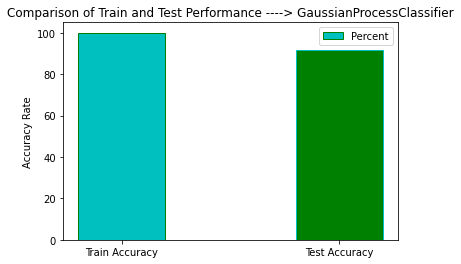

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



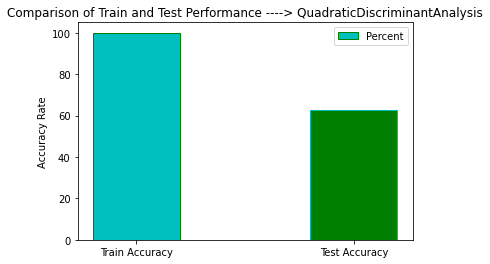

Train Accuracy ----> 1.0
Test Accuracy -----> 0.6285714285714286 



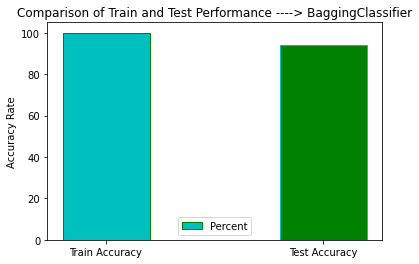

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9428571428571428 



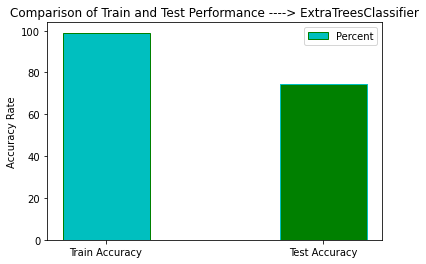

Train Accuracy ----> 0.9901960784313726
Test Accuracy -----> 0.7428571428571429 



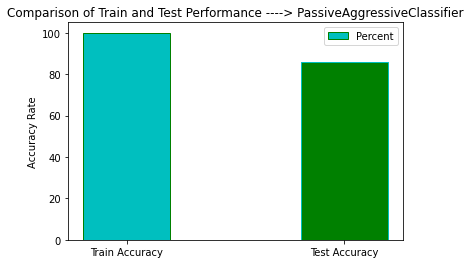

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



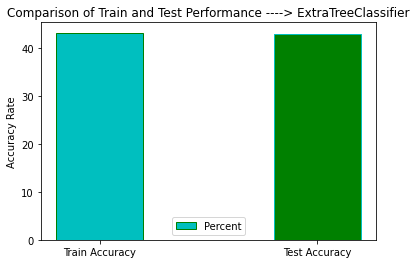

Train Accuracy ----> 0.43137254901960786
Test Accuracy -----> 0.42857142857142855 



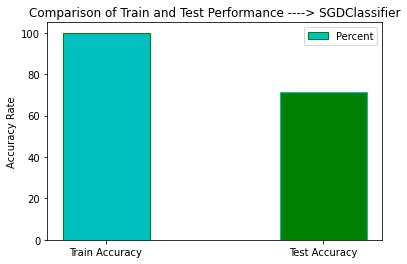

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7142857142857143 



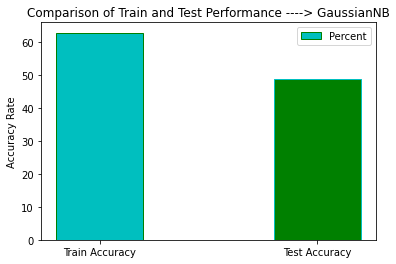

Train Accuracy ----> 0.6274509803921569
Test Accuracy -----> 0.4857142857142857 



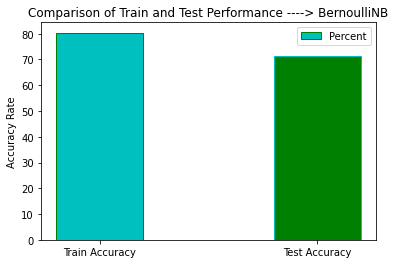

Train Accuracy ----> 0.803921568627451
Test Accuracy -----> 0.7142857142857143 



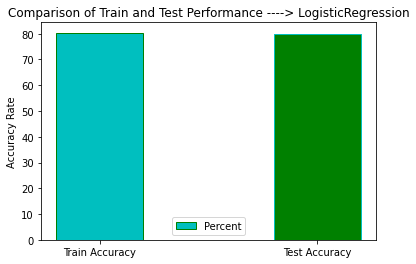

Train Accuracy ----> 0.803921568627451
Test Accuracy -----> 0.8 



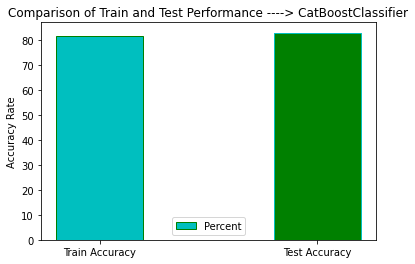

Train Accuracy ----> 0.8137254901960784
Test Accuracy -----> 0.8285714285714286 



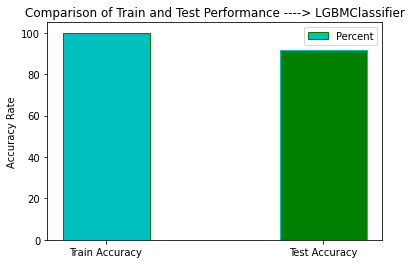

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



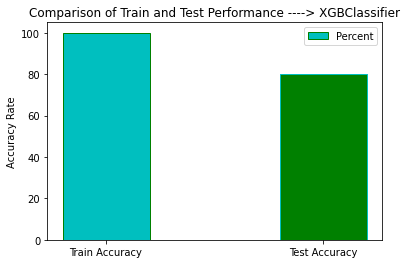

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8 



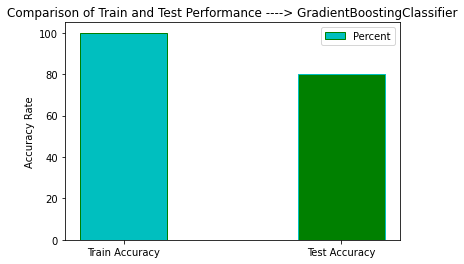

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8 



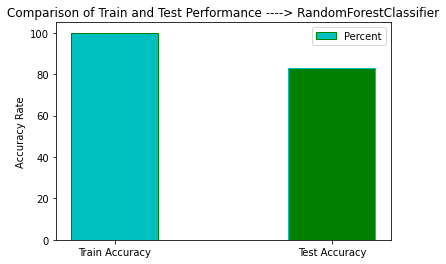

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



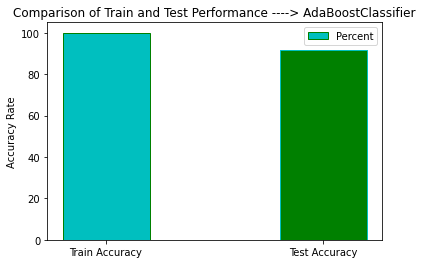

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



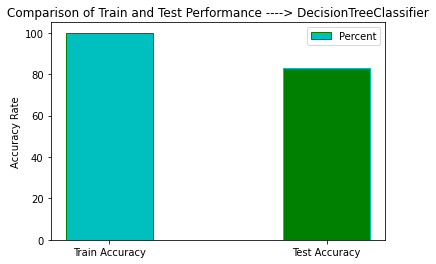

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



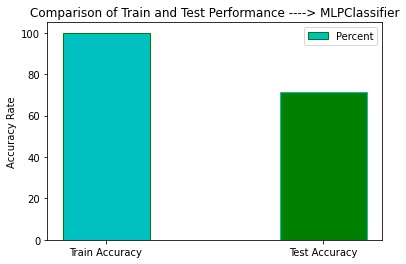

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7142857142857143 



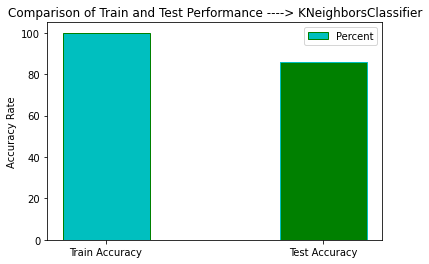

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



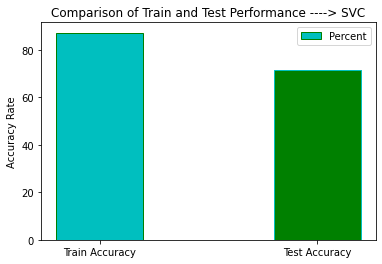

Train Accuracy ----> 0.8725490196078431
Test Accuracy -----> 0.7142857142857143 

('CatBoostClassifier', 0.9142857142857143)
('GaussianProcessClassifier', 0.6285714285714286)
('QuadraticDiscriminantAnalysis', 0.9428571428571428)
('BaggingClassifier', 0.7428571428571429)
('ExtraTreesClassifier', 0.8571428571428571)
('PassiveAggressiveClassifier', 0.42857142857142855)
('ExtraTreeClassifier', 0.7142857142857143)
('SGDClassifier', 0.4857142857142857)
('GaussianNB', 0.7142857142857143)
('BernoulliNB', 0.8)
('LogisticRegression', 0.8285714285714286)
('LGBMClassifier', 0.8)
('XGBClassifier', 0.8)
('GradientBoostingClassifier', 0.8285714285714286)
('RandomForestClassifier', 0.9142857142857143)
('AdaBoostClassifier', 0.8285714285714286)
('DecisionTreeClassifier', 0.7142857142857143)
('MLPClassifier', 0.8571428571428571)
('KNeighborsClassifier', 0.7142857142857143)
('SVC', 0.8)


In [18]:
ml.classificationAlgorithms()

### NORMALİZASYON

In [19]:
data['label'].value_counts()

0    82
1    55
Name: label, dtype: int64

In [20]:
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.208511,0.046378,1191.876887,1010.970409,2317.940090,0.071218,-404.261932,46.967484,-7.201261,24.371670,...,-8.438437,0.542934,-9.503334,-1.075803,-4.814177,-3.322337,-4.774000,-4.782458,0.875527,1
1,0.310353,0.052301,1265.166285,1341.790582,2627.830970,0.061651,-399.053772,64.667770,-10.090115,18.563688,...,-13.095445,-1.403773,-8.981232,0.984661,-4.980649,-7.728048,-6.789982,-6.904977,-5.525095,1
2,0.254283,0.027792,1339.081263,1156.635704,2616.128142,0.087133,-457.335083,42.310505,-15.116784,13.751788,...,-5.403945,1.103961,-11.093071,-4.365703,-6.448308,-3.196815,-3.727760,-2.969156,-1.246591,0
3,0.270943,0.048933,1388.475102,1406.380147,2916.500722,0.072039,-412.115173,74.979736,-12.301971,6.115286,...,-8.388921,-0.425749,-19.135853,-0.027296,-8.053686,-6.327142,-5.105491,-2.721654,-2.634081,0
4,0.212268,0.036037,1072.620801,777.594681,1893.985649,0.074134,-428.523895,38.251453,-17.209015,26.202562,...,-8.552547,4.012875,-5.963981,-1.706108,-8.014425,-3.797354,-3.185341,-5.010346,-3.597100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.243234,0.053727,1188.895095,1059.855773,2270.504628,0.068480,-383.162537,61.051346,-27.016598,19.252123,...,-16.360388,2.427135,-3.456938,-0.391414,-10.832131,-7.106040,-4.170091,-9.399714,-9.053067,1
133,0.127557,0.027628,461.598162,492.269719,882.861328,0.025447,-509.543701,40.720512,-6.449636,3.005561,...,-7.866147,-2.979500,-7.021085,-0.713901,0.474397,-1.026628,-0.931690,0.795974,-1.550510,0
134,0.315909,0.043894,1156.747913,1163.946684,2282.207456,0.065132,-434.573730,59.152565,-2.970357,5.767014,...,-7.162502,-2.646284,-8.764597,-10.050245,-4.263831,-4.511486,-5.846071,-3.167421,-0.955433,0
135,0.133435,0.017964,598.160886,586.701801,1130.181089,0.034258,-514.420532,41.260307,-13.057782,1.646427,...,-3.515516,-3.111073,-6.201277,3.780000,-6.198038,-5.637819,-1.190257,-3.256444,-2.240266,0


In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
normalizer = Normalizer()

In [23]:
X_norm = normalizer.fit_transform(X)

In [24]:
X_norm

array([[ 7.37974395e-05,  1.64145296e-05,  4.21836933e-01, ...,
        -1.68964564e-03, -1.69263920e-03,  3.09872428e-04],
       [ 9.59071799e-05,  1.61623522e-05,  3.90970038e-01, ...,
        -2.09828517e-03, -2.13382168e-03, -1.70740133e-03],
       [ 7.96691110e-05,  8.70743657e-06,  4.19546369e-01, ...,
        -1.16794129e-03, -9.30263579e-04, -3.90568317e-04],
       ...,
       [ 1.11038440e-04,  1.54283212e-05,  4.06583271e-01, ...,
        -2.05482520e-03, -1.11331114e-03, -3.35823579e-04],
       [ 8.90267294e-05,  1.19852817e-05,  3.99088904e-01, ...,
        -7.94131719e-04, -2.17267727e-03, -1.49469056e-03],
       [ 1.03566120e-04,  1.58992191e-05,  3.86979990e-01, ...,
        -1.99298355e-03, -2.00226586e-03, -2.64300422e-03]])

In [25]:
ml = MLAlgorithmsComparison(X_norm, y, test_size=0.25)

[19:30:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.




**********************Graphs**********************


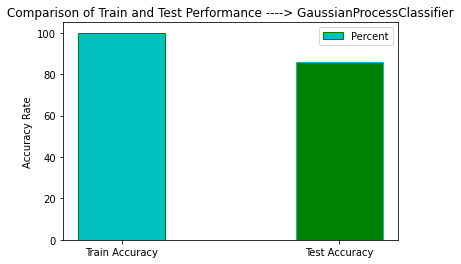

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



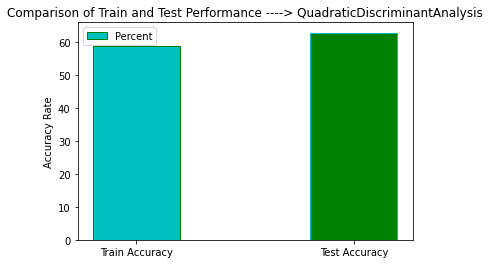

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



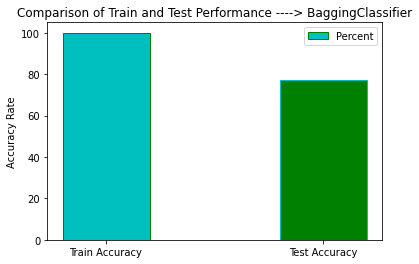

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7714285714285715 



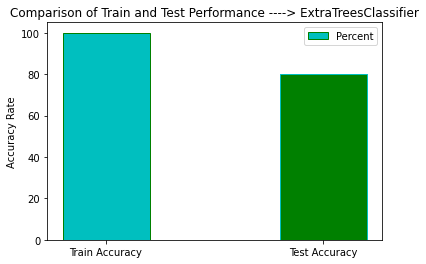

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8 



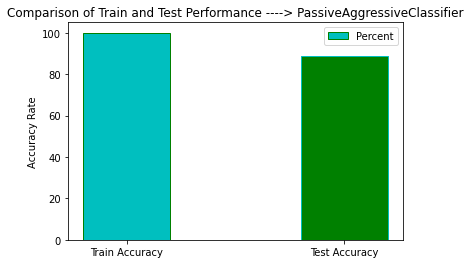

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8857142857142857 



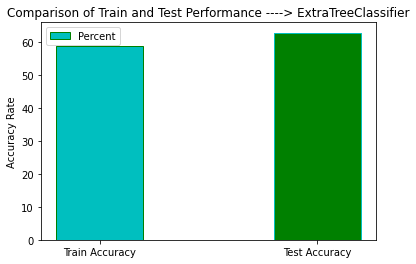

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



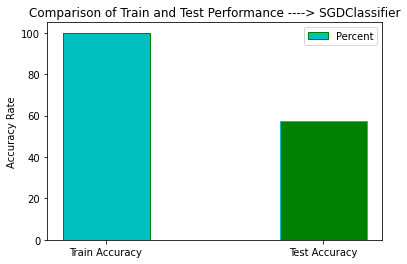

Train Accuracy ----> 1.0
Test Accuracy -----> 0.5714285714285714 



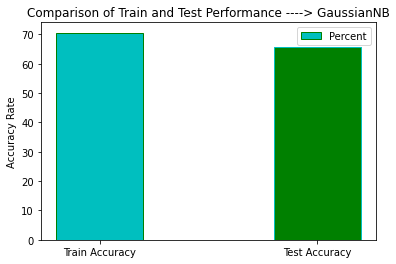

Train Accuracy ----> 0.7058823529411765
Test Accuracy -----> 0.6571428571428571 



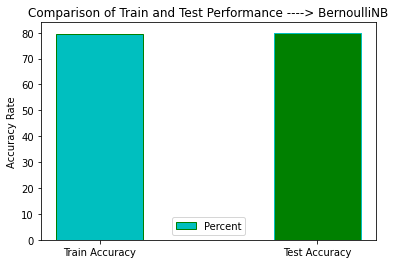

Train Accuracy ----> 0.7941176470588235
Test Accuracy -----> 0.8 



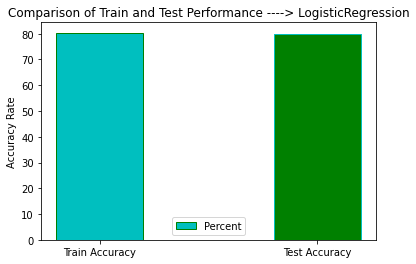

Train Accuracy ----> 0.803921568627451
Test Accuracy -----> 0.8 



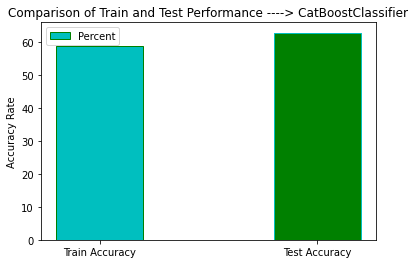

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



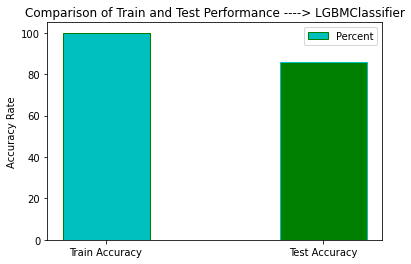

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



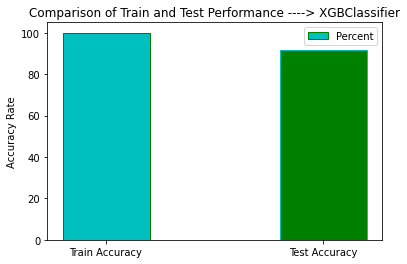

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



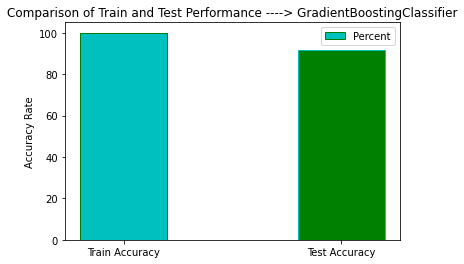

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



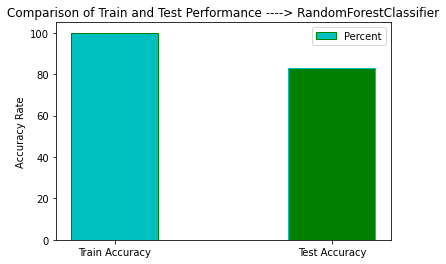

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



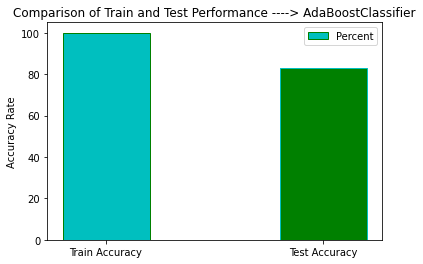

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



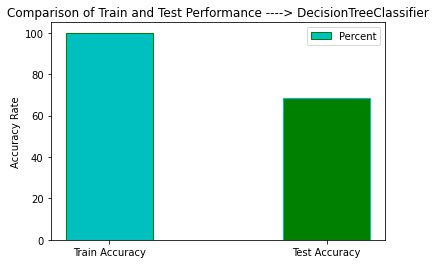

Train Accuracy ----> 1.0
Test Accuracy -----> 0.6857142857142857 



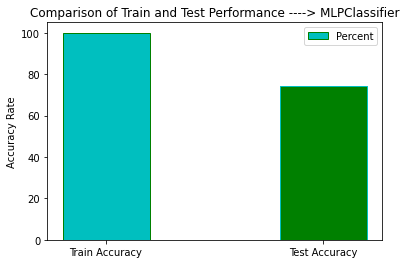

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7428571428571429 



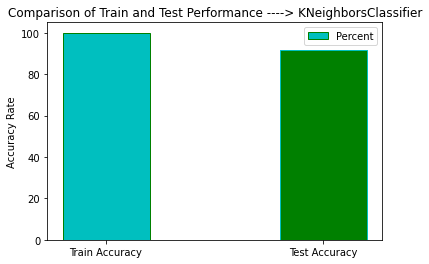

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



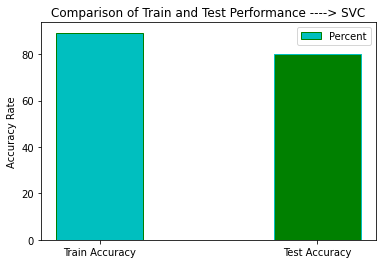

Train Accuracy ----> 0.8921568627450981
Test Accuracy -----> 0.8 

('CatBoostClassifier', 0.8571428571428571)
('GaussianProcessClassifier', 0.6285714285714286)
('QuadraticDiscriminantAnalysis', 0.7714285714285715)
('BaggingClassifier', 0.8)
('ExtraTreesClassifier', 0.8857142857142857)
('PassiveAggressiveClassifier', 0.6285714285714286)
('ExtraTreeClassifier', 0.5714285714285714)
('SGDClassifier', 0.6571428571428571)
('GaussianNB', 0.8)
('BernoulliNB', 0.8)
('LogisticRegression', 0.6285714285714286)
('LGBMClassifier', 0.9142857142857143)
('XGBClassifier', 0.9142857142857143)
('GradientBoostingClassifier', 0.8285714285714286)
('RandomForestClassifier', 0.8285714285714286)
('AdaBoostClassifier', 0.6857142857142857)
('DecisionTreeClassifier', 0.7428571428571429)
('MLPClassifier', 0.9142857142857143)
('KNeighborsClassifier', 0.8)
('SVC', 0.8857142857142857)


In [26]:
ml.classificationAlgorithms()

### Polynomial Features

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures()

In [29]:
X_poly = poly.fit_transform(X)

In [30]:
X_poly.shape

(137, 378)

In [31]:
ml = MLAlgorithmsComparison(X_poly, y, test_size=0.25)

[19:30:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.




**********************Graphs**********************


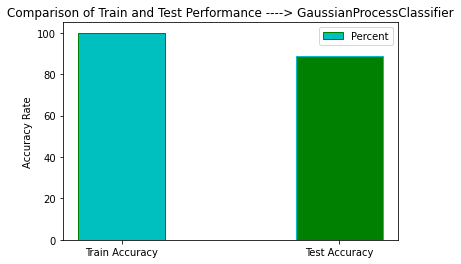

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8857142857142857 



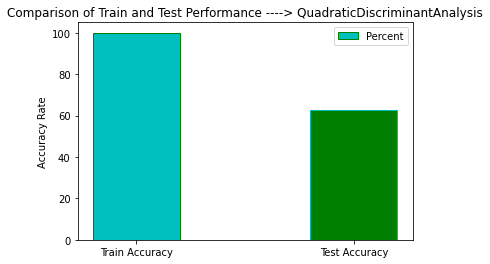

Train Accuracy ----> 1.0
Test Accuracy -----> 0.6285714285714286 



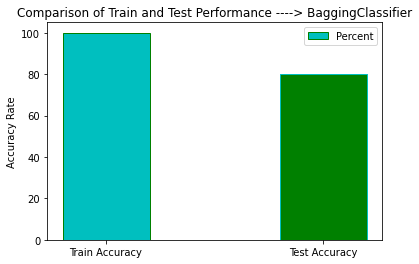

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8 



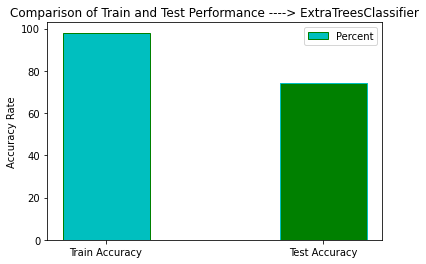

Train Accuracy ----> 0.9803921568627451
Test Accuracy -----> 0.7428571428571429 



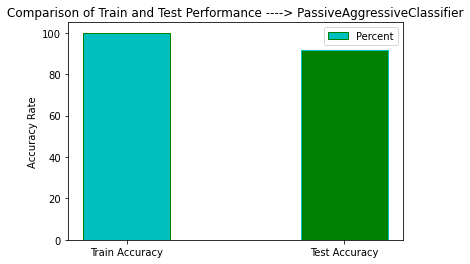

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



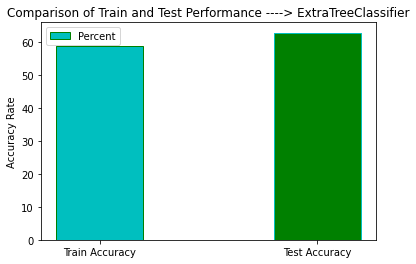

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



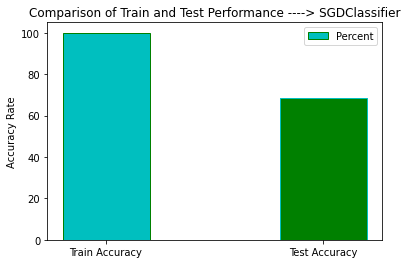

Train Accuracy ----> 1.0
Test Accuracy -----> 0.6857142857142857 



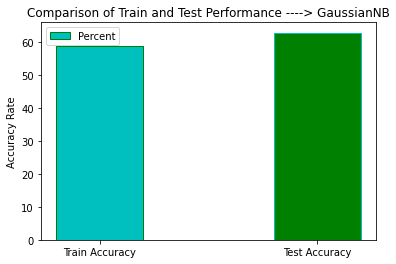

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



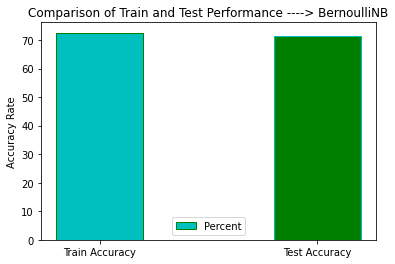

Train Accuracy ----> 0.7254901960784313
Test Accuracy -----> 0.7142857142857143 



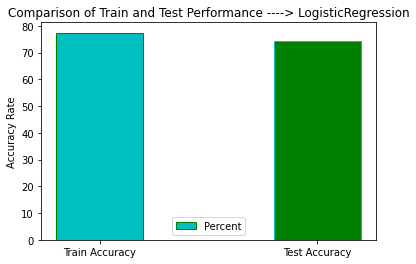

Train Accuracy ----> 0.7745098039215687
Test Accuracy -----> 0.7428571428571429 



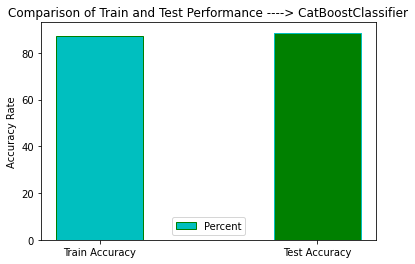

Train Accuracy ----> 0.8725490196078431
Test Accuracy -----> 0.8857142857142857 



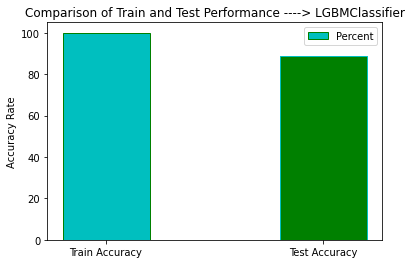

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8857142857142857 



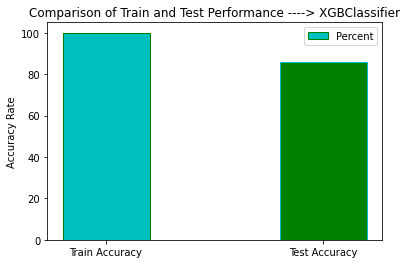

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



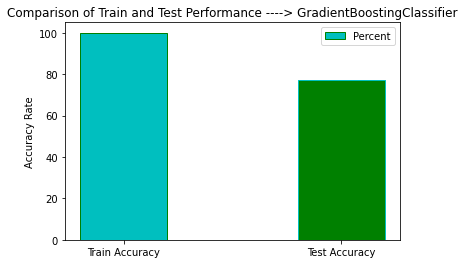

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7714285714285715 



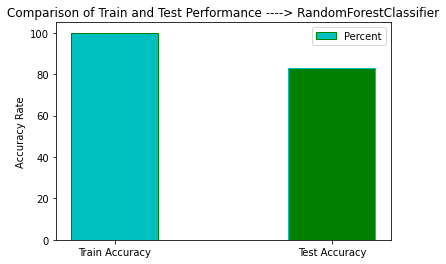

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



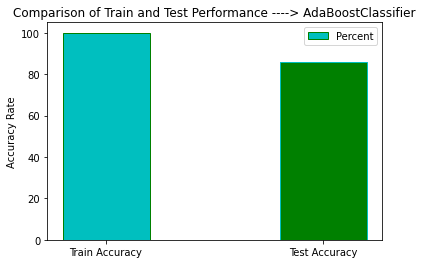

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



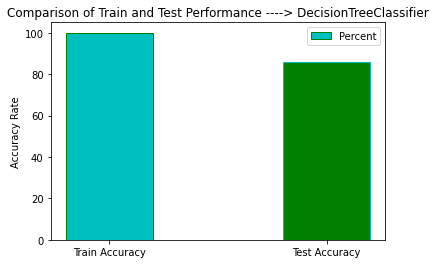

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



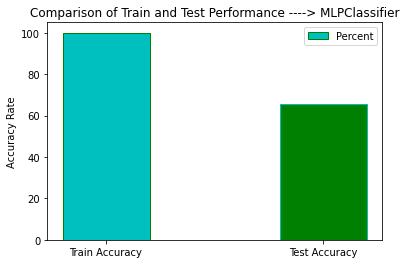

Train Accuracy ----> 1.0
Test Accuracy -----> 0.6571428571428571 



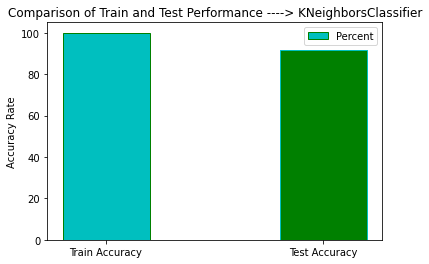

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9142857142857143 



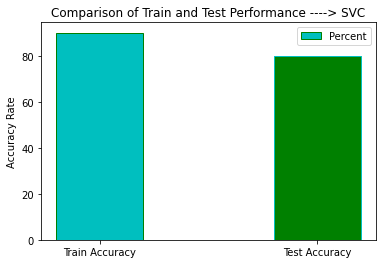

Train Accuracy ----> 0.9019607843137255
Test Accuracy -----> 0.8 

('CatBoostClassifier', 0.8857142857142857)
('GaussianProcessClassifier', 0.6285714285714286)
('QuadraticDiscriminantAnalysis', 0.8)
('BaggingClassifier', 0.7428571428571429)
('ExtraTreesClassifier', 0.9142857142857143)
('PassiveAggressiveClassifier', 0.6285714285714286)
('ExtraTreeClassifier', 0.6857142857142857)
('SGDClassifier', 0.6285714285714286)
('GaussianNB', 0.7142857142857143)
('BernoulliNB', 0.7428571428571429)
('LogisticRegression', 0.8857142857142857)
('LGBMClassifier', 0.8571428571428571)
('XGBClassifier', 0.7714285714285715)
('GradientBoostingClassifier', 0.8285714285714286)
('RandomForestClassifier', 0.8571428571428571)
('AdaBoostClassifier', 0.8571428571428571)
('DecisionTreeClassifier', 0.6571428571428571)
('MLPClassifier', 0.9142857142857143)
('KNeighborsClassifier', 0.8)
('SVC', 0.8285714285714286)


In [32]:
ml.classificationAlgorithms()

### NORMALİZASYON & Polynomial Features

In [33]:
poly = PolynomialFeatures()

In [34]:
X_poly = poly.fit_transform(X)

In [35]:
normalizer = Normalizer()

In [36]:
X_poly_norm = normalizer.fit_transform(X_poly)

In [37]:
X_poly_norm.shape

(137, 378)

In [38]:
ml = MLAlgorithmsComparison(X_poly_norm, y, test_size=0.25)

[19:31:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.




**********************Graphs**********************


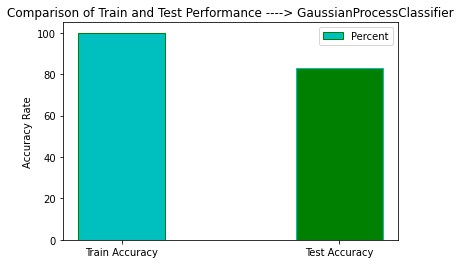

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



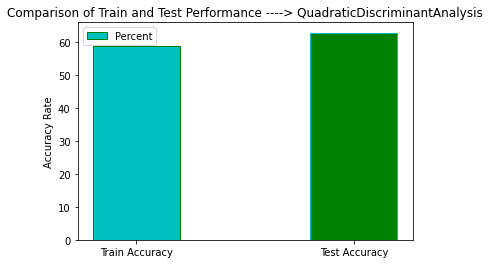

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



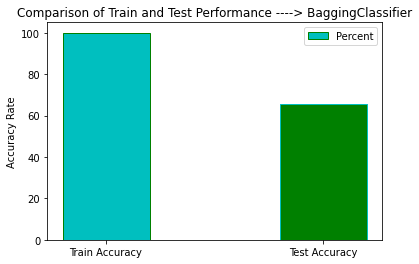

Train Accuracy ----> 1.0
Test Accuracy -----> 0.6571428571428571 



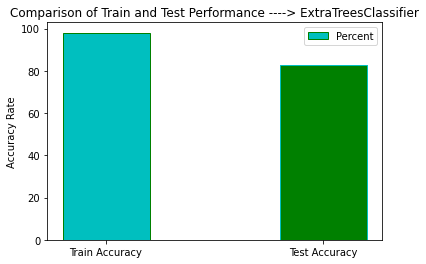

Train Accuracy ----> 0.9803921568627451
Test Accuracy -----> 0.8285714285714286 



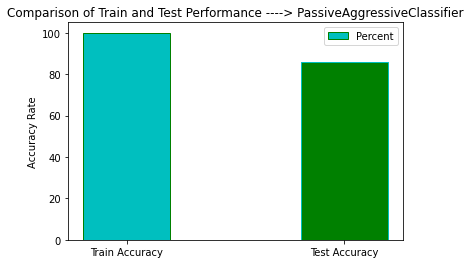

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



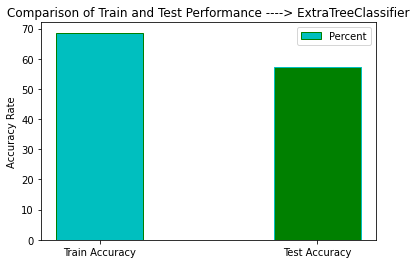

Train Accuracy ----> 0.6862745098039216
Test Accuracy -----> 0.5714285714285714 



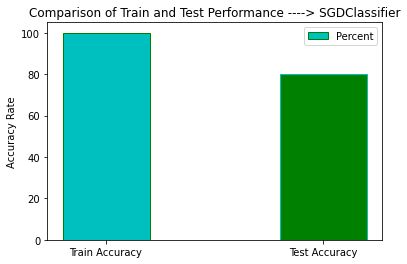

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8 



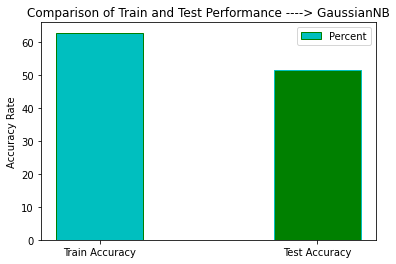

Train Accuracy ----> 0.6274509803921569
Test Accuracy -----> 0.5142857142857142 



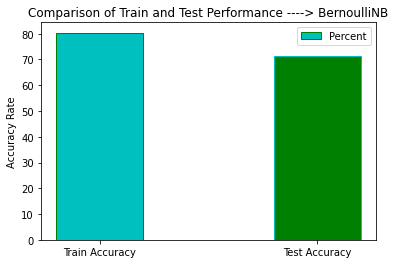

Train Accuracy ----> 0.803921568627451
Test Accuracy -----> 0.7142857142857143 



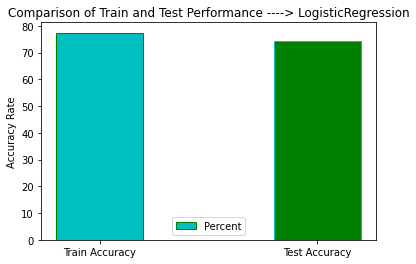

Train Accuracy ----> 0.7745098039215687
Test Accuracy -----> 0.7428571428571429 



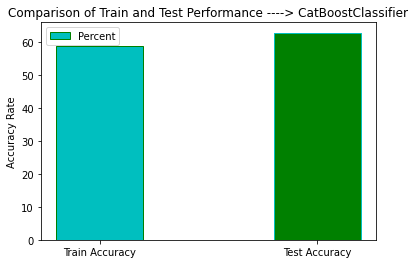

Train Accuracy ----> 0.5882352941176471
Test Accuracy -----> 0.6285714285714286 



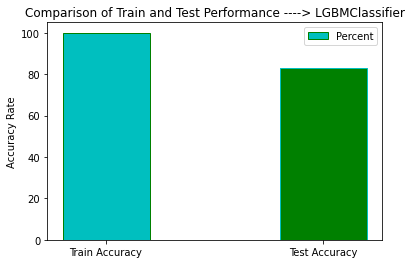

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



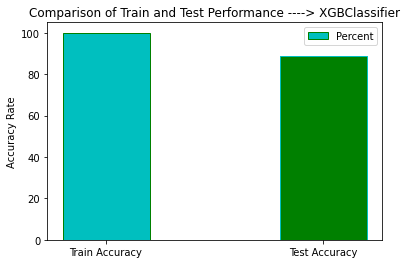

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8857142857142857 



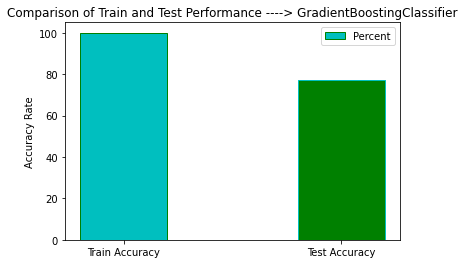

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7714285714285715 



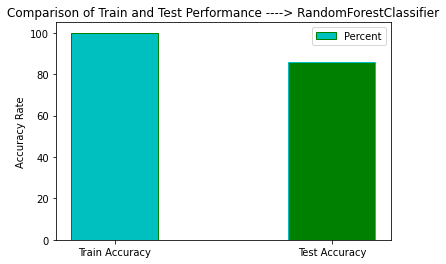

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8571428571428571 



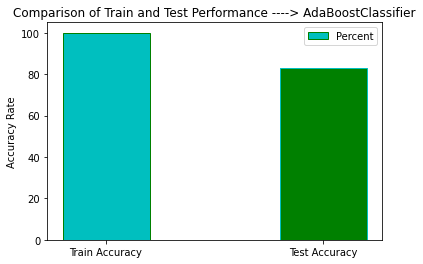

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8285714285714286 



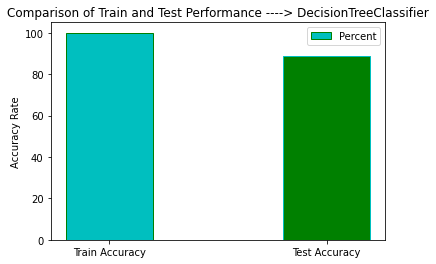

Train Accuracy ----> 1.0
Test Accuracy -----> 0.8857142857142857 



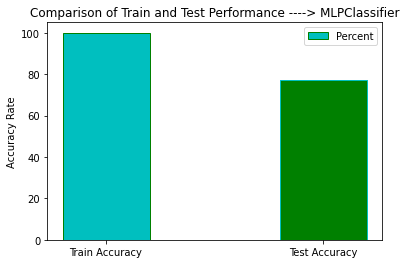

Train Accuracy ----> 1.0
Test Accuracy -----> 0.7714285714285715 



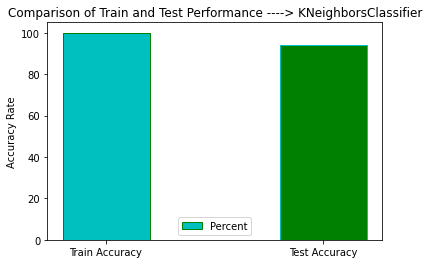

Train Accuracy ----> 1.0
Test Accuracy -----> 0.9428571428571428 



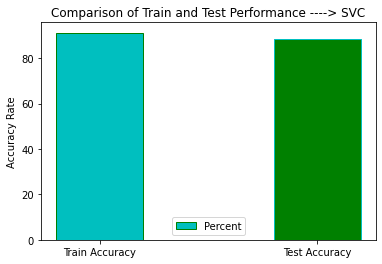

Train Accuracy ----> 0.9117647058823529
Test Accuracy -----> 0.8857142857142857 

('CatBoostClassifier', 0.8285714285714286)
('GaussianProcessClassifier', 0.6285714285714286)
('QuadraticDiscriminantAnalysis', 0.6571428571428571)
('BaggingClassifier', 0.8285714285714286)
('ExtraTreesClassifier', 0.8571428571428571)
('PassiveAggressiveClassifier', 0.5714285714285714)
('ExtraTreeClassifier', 0.8)
('SGDClassifier', 0.5142857142857142)
('GaussianNB', 0.7142857142857143)
('BernoulliNB', 0.7428571428571429)
('LogisticRegression', 0.6285714285714286)
('LGBMClassifier', 0.8857142857142857)
('XGBClassifier', 0.7714285714285715)
('GradientBoostingClassifier', 0.8571428571428571)
('RandomForestClassifier', 0.8285714285714286)
('AdaBoostClassifier', 0.8857142857142857)
('DecisionTreeClassifier', 0.7714285714285715)
('MLPClassifier', 0.9428571428571428)
('KNeighborsClassifier', 0.8857142857142857)
('SVC', 0.8857142857142857)


In [39]:
ml.classificationAlgorithms()

# Quadratic Discriminant Analysis

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [19]:
model = QuadraticDiscriminantAnalysis()

In [20]:
X = data.drop(["label"], axis=1)
y = data["label"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [22]:
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9428571428571428

In [25]:
confusion_matrix(y_test, y_pred)

array([[22,  0],
       [ 2, 11]])

In [26]:
recall_score(y_test, y_pred)

0.8461538461538461

In [27]:
precision_score(y_test, y_pred)

1.0

In [28]:
f1_score(y_test, y_pred)

0.9166666666666666

## Ensemble Learning

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X = data.drop(["label"], axis=1)
y = data["label"]
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=.25, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [32]:
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
qda_clf = QuadraticDiscriminantAnalysis()
voting_clf = VotingClassifier(
    estimators=[('log', log_clf), ('rf', rf_clf), ('svc', svm_clf), ('qda', qda_clf)],
    voting='soft')

In [33]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('qda', QuadraticDiscriminantAnalysis())],
                 voting='soft')

In [34]:
y_pred = voting_clf.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.9714285714285714

In [36]:
confusion_matrix(y_test, y_pred)

array([[22,  0],
       [ 1, 12]])

In [37]:
recall_score(y_test, y_pred)

0.9230769230769231

In [38]:
precision_score(y_test, y_pred)

1.0

In [39]:
f1_score(y_test, y_pred)

0.9600000000000001

In [40]:
import warnings
warnings.filterwarnings("ignore")

for clf in (log_clf, rf_clf, svm_clf, qda_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8857142857142857
RandomForestClassifier 0.8285714285714286
SVC 0.8
QuadraticDiscriminantAnalysis 0.9428571428571428
VotingClassifier 0.9714285714285714


## Adaboost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)

In [44]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [45]:
y_pred = ada_clf.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.8285714285714286

In [47]:
confusion_matrix(y_test, y_pred)

array([[18,  4],
       [ 2, 11]])

In [48]:
recall_score(y_test, y_pred)

0.8461538461538461

In [49]:
precision_score(y_test, y_pred)

0.7333333333333333

In [50]:
f1_score(y_test, y_pred)

0.7857142857142856

# MLPC

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
mlpc_clf = MLPClassifier().fit(X_train, y_train)

In [13]:
y_pred = mlpc_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [15]:
accuracy_score(y_test, y_pred)

0.6571428571428571

In [16]:
confusion_matrix(y_test, y_pred)

array([[22,  0],
       [12,  1]])

In [17]:
precision_score(y_test, y_pred)

1.0

In [18]:
recall_score(y_test, y_pred)

0.07692307692307693

In [19]:
f1_score(y_test, y_pred)

0.14285714285714288